In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

# Data analysis

In [2]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)

How data looks like:

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Our target variable is price.
First, we will check our data for nulls:

In [4]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


No nulls.

x, y, z there are min values = 0

In [6]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
# drop those rows
diamonds.drop(diamonds[(diamonds.x == 0) | (diamonds.y == 0) | (diamonds.z == 0)].index, inplace=True)


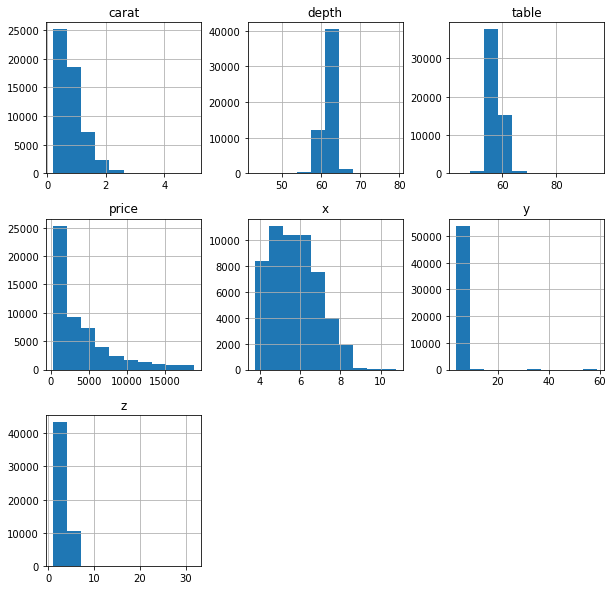

In [8]:
## Visual analysis

# Values

diamonds.hist(figsize=(10, 10))
plt.show()

In [9]:
# Distribution

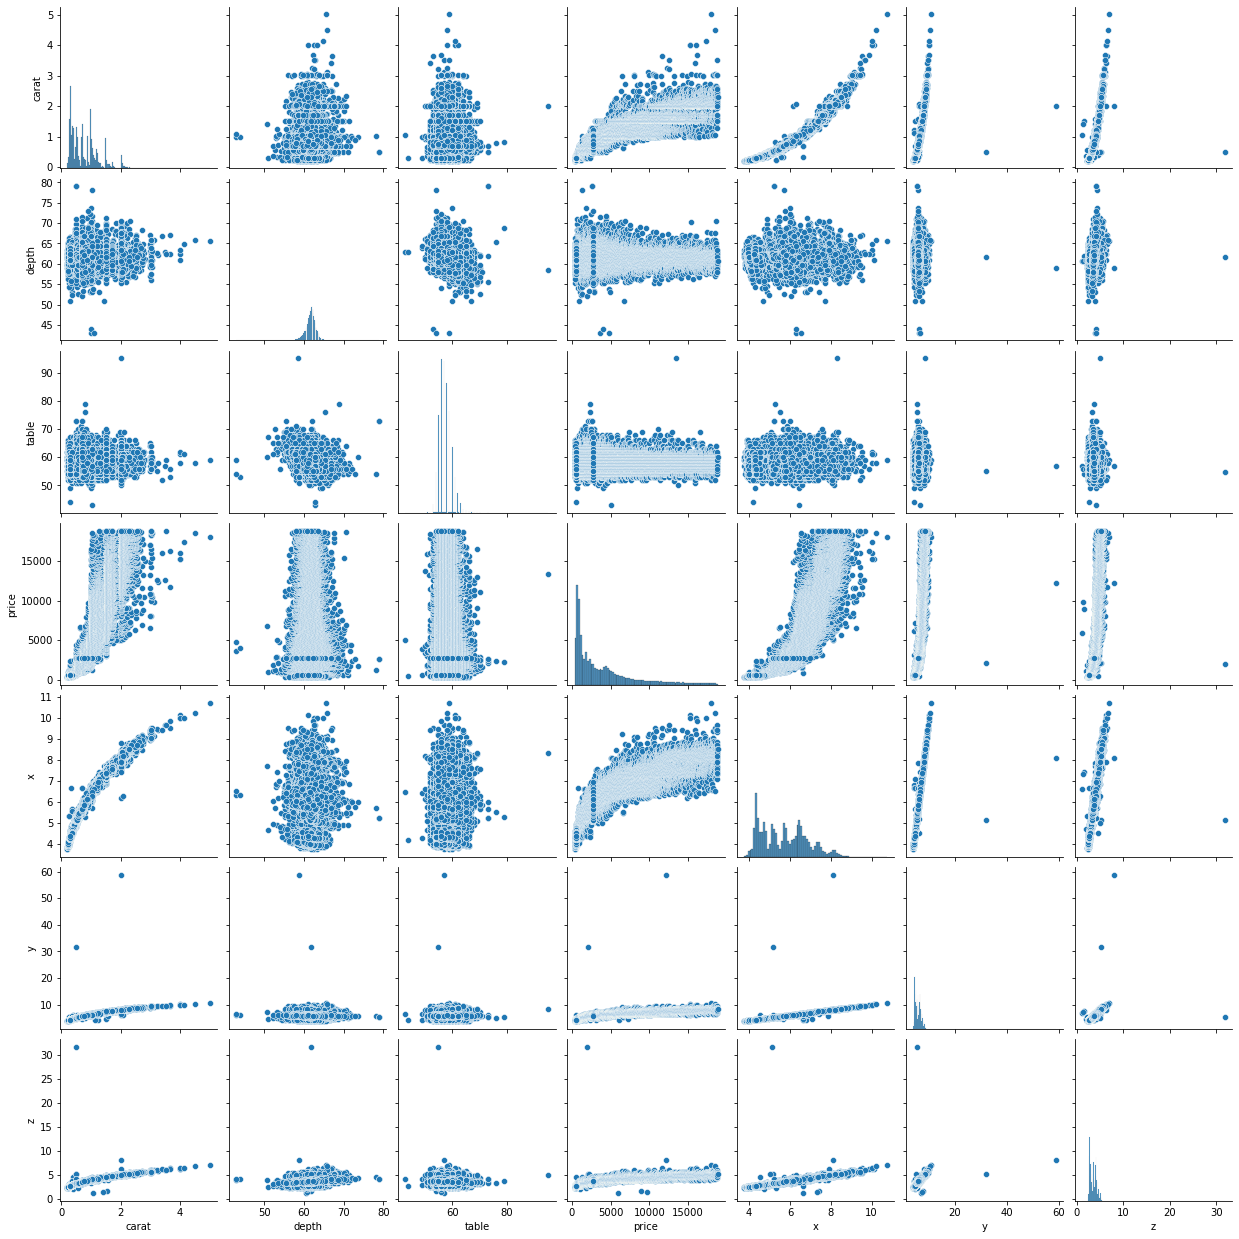

In [10]:
sns.pairplot(diamonds) 
plt.show()

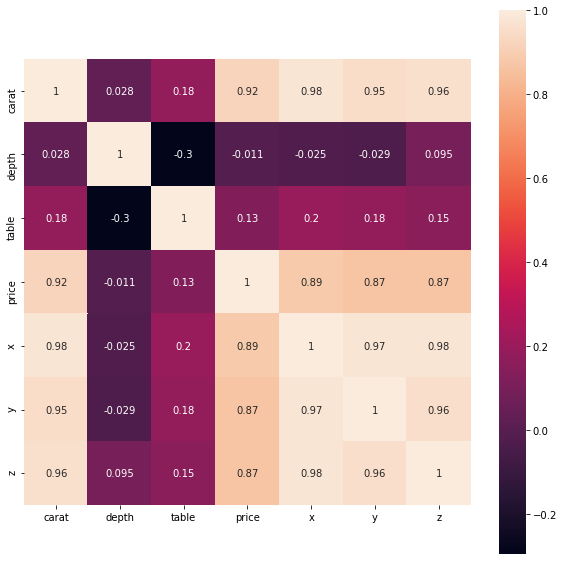

In [11]:
# Correlation
plt.figure(figsize=(10,10))
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
plt.show()

In [12]:
# Categorical variables - quantity

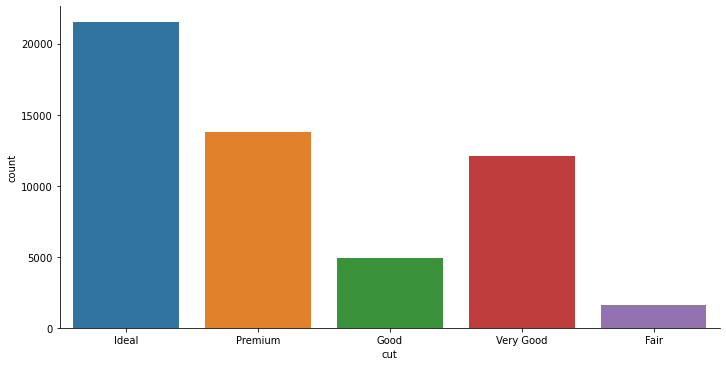

In [13]:
p = sns.catplot(x='cut', data=diamonds , kind='count',aspect=2 )

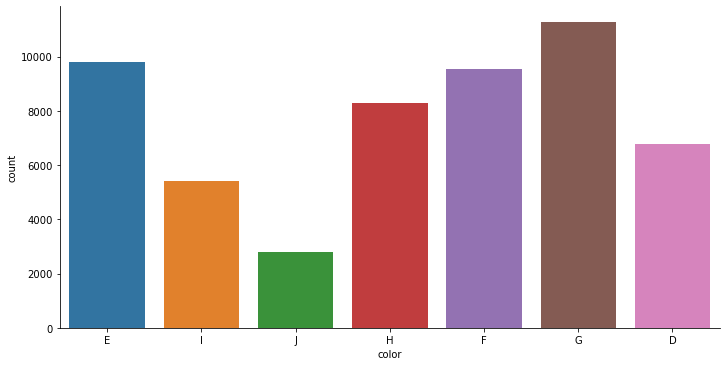

In [14]:
p = sns.catplot(x='color', data=diamonds , kind='count',aspect=2 )

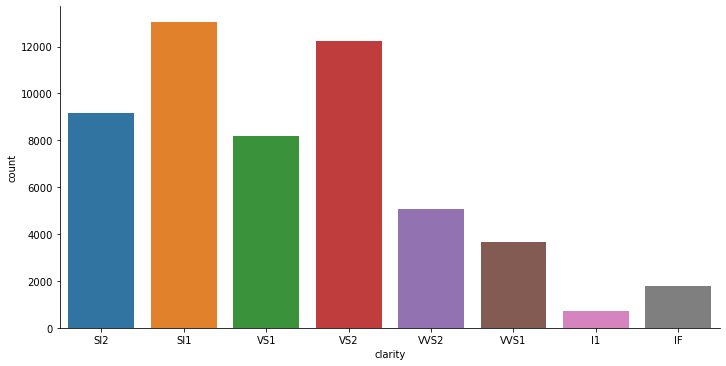

In [15]:
p = sns.catplot(x='clarity', data=diamonds , kind='count',aspect=2 )

In [16]:
# Analyzing outliers

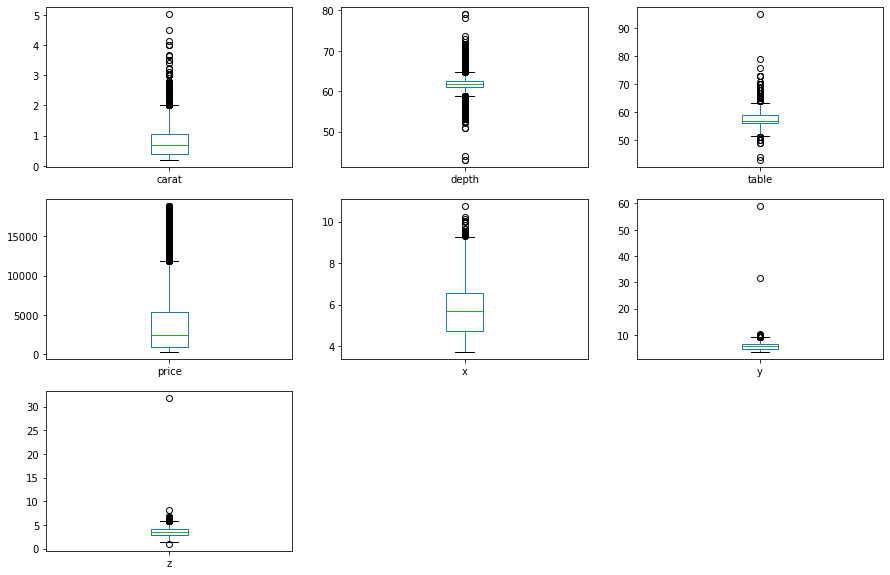

In [17]:
diamonds.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [18]:
# There are outliers for: table, y and z

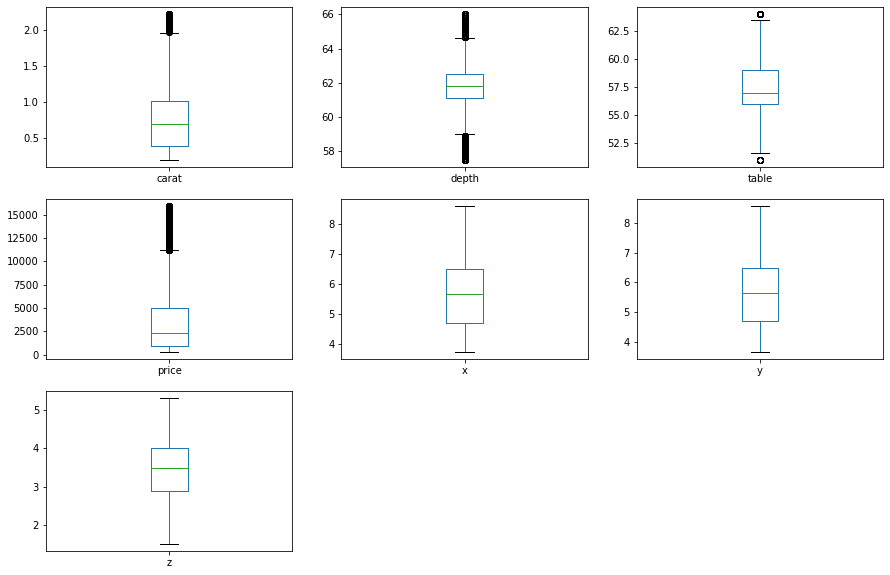

In [19]:
diamonds = diamonds[(np.abs(stats.zscore(diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])) < 3).all(axis=1)]
diamonds.shape
diamonds.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [20]:
# Preparing data for training

In [21]:
# one-hot enocoding categorical data
one_hot_encoded_data = pd.get_dummies(diamonds)
one_hot_encoded_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
6,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
# axis = 1 because it's two-dimensional
x = one_hot_encoded_data.drop(["price"], axis=1)
y = one_hot_encoded_data.price

In [23]:
# creating training set
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42)

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [25]:
lr = linear_model.LinearRegression()
lr.fit(train_x,train_y)
lr_y_pred = lr.predict(test_x)

print("Test set score: {:.2f}".format(lr.score(test_x,test_y)))
print("Training set score: {:.2f}".format(lr.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(lr_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.9627001227515024


In [26]:
# Ridge 

In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge = Ridge().fit(train_x, train_y)
ridge.fit(train_x,train_y)
ridge_y_pred = ridge.predict(test_x)
print("Test set score: {:.2f}".format(ridge.score(test_x,test_y)))
print("Training set score: {:.2f}".format(ridge.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(ridge_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.962692726195572


In [29]:
ridge10 = Ridge(alpha=10).fit(train_x, train_y)
ridge10.fit(train_x,train_y)
ridge10_y_pred = ridge10.predict(test_x)
print("Test set score: {:.2f}".format(ridge10.score(test_x,test_y)))
print("Training set score: {:.2f}".format(ridge10.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(ridge10_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.9625514180591301


In [30]:
ridge01 = Ridge(alpha=0.1).fit(train_x, train_y)
ridge01.fit(train_x,train_y)
ridge01_y_pred = ridge01.predict(test_x)
print("Test set score: {:.2f}".format(ridge01.score(test_x,test_y)))
print("Training set score: {:.2f}".format(ridge01.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(ridge01_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.9626994798006016


In [31]:
# Lasso

In [32]:
from sklearn.linear_model import Lasso

In [33]:
# Lasso alpha = 1
lasso1 = Lasso(alpha=1, max_iter=100000).fit(train_x, train_y)
lasso1.fit(train_x, train_y)
lasso1_y_pred = lasso1.predict(test_x)
print("Test set score: {:.2f}".format(lasso1.score(test_x,test_y)))
print("Training set score: {:.2f}".format(lasso1.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(lasso1_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.9625251163125365


In [34]:
# Lasso alpha = 0.01
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(train_x, train_y)
lasso01.fit(train_x, train_y)
lasso01_y_pred = lasso01.predict(test_x)
print("Test set score: {:.2f}".format(lasso01.score(test_x,test_y)))
print("Training set score: {:.2f}".format(lasso01.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(lasso01_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.9626999516067092


In [35]:
# Lasso alpha = 0.001
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(train_x, train_y)
lasso001.fit(train_x, train_y)
lasso001_y_pred = lasso001.predict(test_x)
print("Test set score: {:.2f}".format(lasso001.score(test_x,test_y)))
print("Training set score: {:.2f}".format(lasso001.score(train_x, train_y)))
print("R2  : {}".format(np.sqrt(r2_score((test_y),(lasso001_y_pred)))))

Test set score: 0.93
Training set score: 0.93
R2  : 0.9627001000192034


In [36]:
# Now, we will show coefficients on the plot. 
# First, we will scale them.

In [37]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Lasso
lasso1_coef_scaled = lasso1.coef_.reshape(-1, 1)
lasso1_scaled = min_max_scaler.fit_transform(lasso1_coef_scaled)

lasso01_coef_scaled = lasso01.coef_.reshape(-1, 1)
lasso01_scaled = min_max_scaler.fit_transform(lasso01_coef_scaled)

lasso001_coef_scaled = lasso001.coef_.reshape(-1, 1)
lasso001_scaled = min_max_scaler.fit_transform(lasso001_coef_scaled)

# Ridge
ridge_coef_scaled = ridge.coef_.reshape(-1, 1)
ridge_scaled = min_max_scaler.fit_transform(ridge_coef_scaled)

ridge10_coef_scaled = ridge10.coef_.reshape(-1, 1)
ridge10_scaled = min_max_scaler.fit_transform(ridge10_coef_scaled)

ridge01_coef_scaled = ridge01.coef_.reshape(-1, 1)
ridge01_scaled = min_max_scaler.fit_transform(ridge01_coef_scaled)

# Linear 
lr_coef_scaled = lr.coef_.reshape(-1, 1)
lr_scaled = min_max_scaler.fit_transform(lr_coef_scaled)

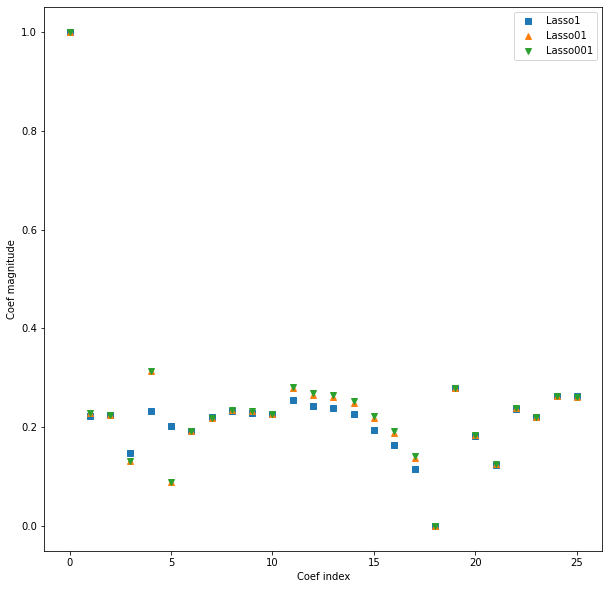

In [38]:
plt.figure(figsize=(10,10))
plt.plot(lasso1_scaled, 's', label="Lasso1")
plt.plot(lasso01_scaled, '^', label="Lasso01")
plt.plot(lasso001_scaled, 'v', label="Lasso001")

#plt.plot(lr_scaled, 'o', label="Linear Regression")
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")
#plt.hlines(0, 0, len(lr_scaled))
#plt.ylim(-25, 25)
plt.legend()
plt.show()

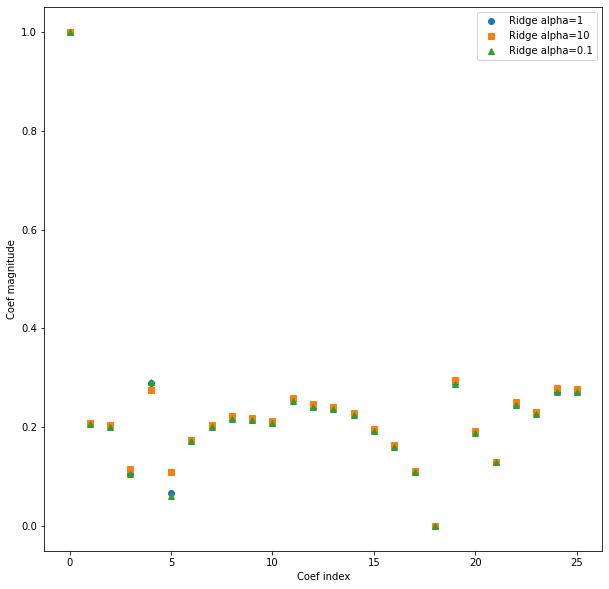

In [39]:
plt.figure(figsize=(10,10))
plt.plot(ridge_scaled, 'o', label="Ridge alpha=1")
plt.plot(ridge10_scaled, 's', label="Ridge alpha=10")
plt.plot(ridge01_scaled, '^', label="Ridge alpha=0.1")
#plt.plot(lr_scaled, 'o', label="Linear Regression")
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")
#plt.hlines(0, 0, len(lr_scaled))
#plt.ylim(-25, 25)
plt.legend()
plt.show()

In [40]:
lr_coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient Linear Regression'])

In [41]:
ridge_coeff_df = pd.DataFrame(ridge.coef_, x.columns, columns=['Coefficient Ridge1'])
ridge10_coeff_df = pd.DataFrame(ridge10.coef_, x.columns, columns=['Coefficient Ridge10'])
ridge01_coeff_df = pd.DataFrame(ridge01.coef_, x.columns, columns=['Coefficient Ridge01'])

In [42]:
lasso1_coeff_df = pd.DataFrame(lasso1.coef_, x.columns, columns=['Coefficient Lasso1'])
lasso01_coeff_df = pd.DataFrame(lasso01.coef_, x.columns, columns=['Coefficient Lasso01'])
lasso001_coeff_df = pd.DataFrame(lasso001.coef_, x.columns, columns=['Coefficient Lasso001'])

In [43]:
concat_coef = pd.concat([lr_coeff_df, ridge_coeff_df, ridge10_coeff_df, ridge01_coeff_df, lasso1_coeff_df, lasso01_coeff_df, lasso001_coeff_df], axis=1, sort=False)
concat_coef
# In Lasso, some features were ignored - cut

,Coefficient Linear Regression,Coefficient Ridge1,Coefficient Ridge10,Coefficient Ridge01,Coefficient Lasso1,Coefficient Lasso01,Coefficient Lasso001
carat,12057.164508,11999.144325,11505.239145,12051.331326,11810.211528,12054.662183,12056.920175
depth,53.477264,48.075653,19.194611,52.905746,-55.839492,52.415873,53.353846
table,-30.257206,-30.228061,-29.778767,-30.254597,-32.831770,-30.285182,-30.260477
x,-1467.229660,-1457.742541,-1317.259392,-1466.391122,-1206.426038,-1465.934783,-1467.035671
y,1364.950135,1312.298250,981.852043,1359.476004,83.525449,1353.889484,1363.605674
z,-2149.098272,-2042.522560,-1422.861255,-2137.903968,-351.564173,-2131.800301,-2147.091611
cut_Fair,-445.017416,-446.889296,-459.418401,-445.210630,-534.552335,-523.923359,-523.976634
cut_Good,-29.670127,-28.914466,-24.491280,-29.591192,-99.634677,-108.503995,-108.610470
cut_Ideal,216.433910,216.723543,218.838178,216.463446,113.930170,137.273844,137.457636
cut_Premium,179.302854,178.965529,176.487545,179.268709,47.806479,99.917780,100.298856


In [44]:
# applying neural network

In [45]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)


Epoch 1/10
76/76 [==============================] - 0s 4ms/step - loss: 23495910.0000 - val_loss: 16637168.0000
Epoch 2/10
76/76 [==============================] - 0s 3ms/step - loss: 5788700.5000 - val_loss: 1196739.1250
Epoch 3/10
76/76 [==============================] - 0s 3ms/step - loss: 793876.1250 - val_loss: 541711.0000
Epoch 4/10
76/76 [==============================] - 0s 3ms/step - loss: 490093.4062 - val_loss: 447973.2500
Epoch 5/10
76/76 [==============================] - 0s 3ms/step - loss: 430623.4688 - val_loss: 413566.3125
Epoch 6/10
76/76 [==============================] - 0s 3ms/step - loss: 397585.8125 - val_loss: 388755.5938
Epoch 7/10
76/76 [==============================] - 0s 3ms/step - loss: 370046.1250 - val_loss: 360906.5000
Epoch 8/10
76/76 [==============================] - 0s 3ms/step - loss: 342237.7188 - val_loss: 338535.5000
Epoch 9/10
76/76 [==============================] - 0s 3ms/step - loss: 320916.8750 - val_loss: 318947.4062
Epoch 10/10
76/76 [===

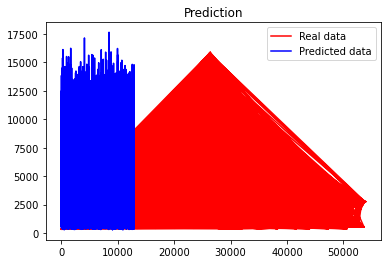

556.6762629028871

In [66]:
model = Sequential()

model.add(Dense(256,activation='relu',input_dim= train_x.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss = 'mse')
model.fit(x = train_x, y = train_y, validation_data=(test_x, test_y), epochs = 10, batch_size=512)

y_pred = model.predict(test_x)

plt.plot(test_y, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

mean_squared_error(test_y, y_pred) ** 0.5

In [50]:
train_y.shape

(38689,)

In [51]:
train_x.shape

(38689, 26)